Autores: Enrique Juliá, Leo Pérez y Sara Verde

# Proyecto 1 de Aprendizaje Automático

**Using the 'Wisconsin Diagnostic Breast Cancer' employed in the previous PCA notebook, the students will perform the following tasks:**

**a) Read the dataset;**

**b) Perform a PCA analysis over the data;**

**c) Project the data into the PC space;**

**d) Apply both k-means and GMM over the projected data;**

**e) Compare the obtained clusters with the real labels.**

In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.cluster import KMeans

### **a) Read the dataset**

El conjunto de datos utilizado es la "Wisconsin Diagnostic Breast Cancer Database", en la que se encuentran recogidas las características de un cierto número de tumores de mama y su clasificación en tumores benignos y malignos.

In [47]:
# Cargamos los datos
wdbc = pd.read_csv('./wdbc.csv', header = None)
# Vemos cuáles son las dimensiones de la tabla para hacernos una idea de cuántos datos tenemos
wdbc.shape

(569, 32)

In [48]:
# Visualizamos las primeras filas de la tabla para ver qué tipo de datos tenemos
wdbc.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Al visualizar los datos, vemos que efectivamente la tabla no tiene cabecero, y que tenemos 569 instancias (casos) de las cuales se están evaluando 30 características (la primera columna, con datos de tipo integer, corresponde al número de identificación de cada instancia y la segunda a su clasificación como tumor benigno o maligno).

In [49]:
# Confirmamos el tipo de datos que tenemos
wdbc.dtypes

0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object

In [50]:
# Realizamos un análisis estadístico básico de los datos para hacernos una idea de su variabilidad
numeric_data = wdbc.iloc[:, 2:]
stats_num = numeric_data.describe()
stats_num

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Gracias a este análisis estadístico vemos que cada columna toma valores muy diferentes, y que la variabilidad tampoco es la misma en todos los casos. Esto es aún más evidente cuando representamos los datos en un histograma:

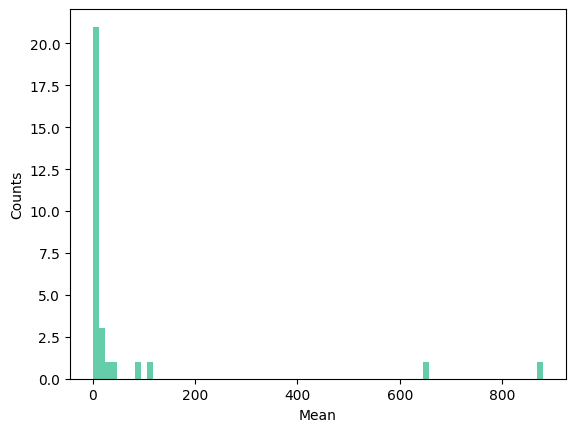

In [51]:
hist = plt.hist(stats_num.loc['mean'], bins=75, color='#66CDAA')
plt.xlabel('Mean')
plt.ylabel('Counts')
plt.show()

La mayor parte de las columnas toman valores por debajo de 100, sin embargo, algunas columnas toman valores muchos más grandes. Algo parecido sucede con la variabilidad:

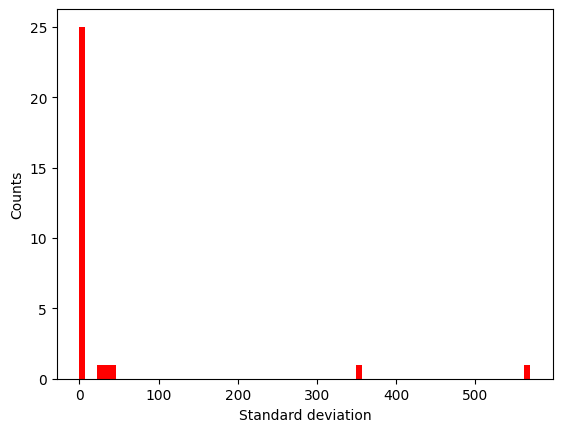

In [52]:
hist = plt.hist(stats_num.loc['std'], bins=75, color='red')
plt.xlabel('Standard deviation')
plt.ylabel('Counts')
plt.show()

A la hora de realizar el Análisis de Componentes Principales (PCA) tendremos que tener esto en cuenta, ya que diferencias tan grandes entre los rangos de valores que toman las distintas columnas pueden conducir a un resultado erróneo.

In [47]:
X = data.values[:,2:].astype(float) # no nos interesa el identificador asi ni la etiqueta
y = (data.values[:,1]=='B').astype(int) #guardamos la etiqueta en y
target_names = np.array([('malign'),('benign')],dtype='U10') #los guardamos como el nombre completo en un array de 2x1

In [ ]:
print(f"number of malign cases = {(target_names[y]=="malign").sum()}")
print(f"number of benign cases = {(target_names[y]=="benign").sum()}")

number of malign cases = 212
number of benign cases = 357


### b) Perform a PCA analysis over the data
El Análisis de Componentes Principales (PCA) se emplea para reducir la dimensionalidad de un conjunto de datos manteniendo la mayor cantidad de información posible. 

- En primer lugar, se identifican las direcciones (componentes principales) en las que los datos presentan mayor varianza. Estas direcciones son combinaciones lineales de las variables originales. 

- A continuación, se seleccionan los componentes principales que capturan la mayor parte de la varianza en los datos. 

- Por último, los datos originales se proyectan sobre estos componentes principales, creando un nuevo espacio con menos dimensiones pero que retiene las características esenciales.

La normalización de los datos es esencial antes de realizar un PCA, ya que si las variables originales tienen diferentes escalas, aquellas con valores más grandes dominarán el cálculo de la varianza, y las variables con valores más pequeños podrían perder importancia. Al estandarizar los datos, se eliminan las unidades y se pone a todas las características en la misma escala, permitiendo que el PCA capture patrones inherentes en los datos, no simplemente la influencia de magnitudes.

Cálculo del número de componentes necesarias sin normalizar

In [59]:
# Normalizamos los datos
stats = wdbc.describe()
data = wdbc.copy()
means = stats.loc['mean'] # Almacenamos las medias
stds = stats.loc['std'] # Almacenamos las desviaciones estándar
for column in range(2, data.shape[1]):
    data.iloc[:,column]=(data.iloc[:,column]-means[column])/stds[column] # Restamos la media y dividimos por la desviación estándar
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,842517,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,84300903,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,84348301,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,84358402,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


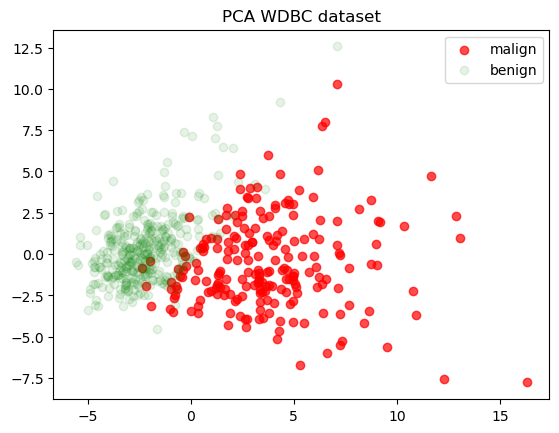

In [49]:
from sklearn.decomposition import PCA

X_r= PCA(n_components=17).fit_transform(X)

plt.figure()
comp1=0; #first component to visualize, you can modify it
comp2=1; #second component to visualize, you can modify it

# plot the two components selected above for both malign and benign tumors
plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='r', alpha=.7, lw=1,
                label='malign')

plt.scatter(X_r[y == 1, comp1], X_r[y == 1, comp2], color='g', alpha=.1, lw=1,
                label='benign')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA WDBC dataset')


plt.show()

c:\Users\cvzad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


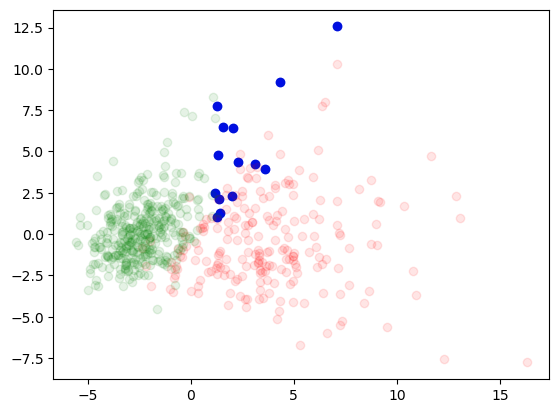

In [65]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

cluster = y & y_kmeans


plt.scatter(X_r[cluster == 1, comp1], X_r[cluster == 1, comp2], color='b', alpha=1, lw=1,
                label='malign')

plt.scatter(X_r[cluster == 1, comp1], X_r [cluster == 1, comp2], color='b', alpha=.1, lw=1,
                label='beign')

plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='r', alpha=.1, lw=1,
                label='malign')

plt.scatter(X_r[y == 1, comp1], X_r [y == 1, comp2], color='g', alpha=.1, lw=1,
                label='beign')

target_names_2 = np.array([('M'), ('B')], dtype = np.dtype('U10'))

df['cluster'] = target_names_2[y_kmeans]

plt.show()